In [1]:
from keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FeatureExtractor:
    def __init__(self):
        base_model = InceptionV3(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

    def extract(self, img):
        img = img.resize((299, 299))
        img = img.convert('RGB')
        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [3]:
image_dir = "fruits/datasets/"

feature_extractor = FeatureExtractor()

# List to store features and image paths
features = []
image_paths = []
file_names = []

# Extract features for each image
for img_path in sorted(Path(image_dir).glob('*')):
    print(img_path)
    img = Image.open(img_path)
    feature = feature_extractor.extract(img)
    features.append(feature)
    image_paths.append(str(img_path))
    file_names.append(img_path.stem)

# Convert lists to numpy arrays
features = np.array(features)
image_paths = np.array(image_paths)
file_names = np.array(file_names)

# Save features and image paths to files
np.save("fruits/features.npy", features)
np.save("fruits/image_paths.npy", image_paths)
np.save("fruits/file_names.npy", file_names)

fruits\datasets\Anggur (1).jpeg
1/1 [==============================] - 8s 8s/step
fruits\datasets\Anggur (1).jpg
1/1 [==============================] - 0s 356ms/step
fruits\datasets\Anggur (10).jpg
1/1 [==============================] - 0s 380ms/step
fruits\datasets\Anggur (11).jpg
1/1 [==============================] - 0s 377ms/step
fruits\datasets\Anggur (12).jpg
1/1 [==============================] - 0s 380ms/step
fruits\datasets\Anggur (13).jpg
1/1 [==============================] - 0s 358ms/step
fruits\datasets\Anggur (14).jpg
1/1 [==============================] - 0s 329ms/step
fruits\datasets\Anggur (15).jpg
1/1 [==============================] - 0s 332ms/step
fruits\datasets\Anggur (16).jpg
1/1 [==============================] - 0s 355ms/step
fruits\datasets\Anggur (17).jpg
1/1 [==============================] - 0s 327ms/step
fruits\datasets\Anggur (18).jpg
1/1 [==============================] - 0s 338ms/step
fruits\datasets\Anggur (19).jpg
1/1 [==============================] 

Fruits List.
1. Apple
2. Banana
3. Grapes
4. Cherry
5. Orange
6. Chickoo
7. Mango
8. Strawberry
9. Kiwi
1/1 [==============================] - 3s 3s/step


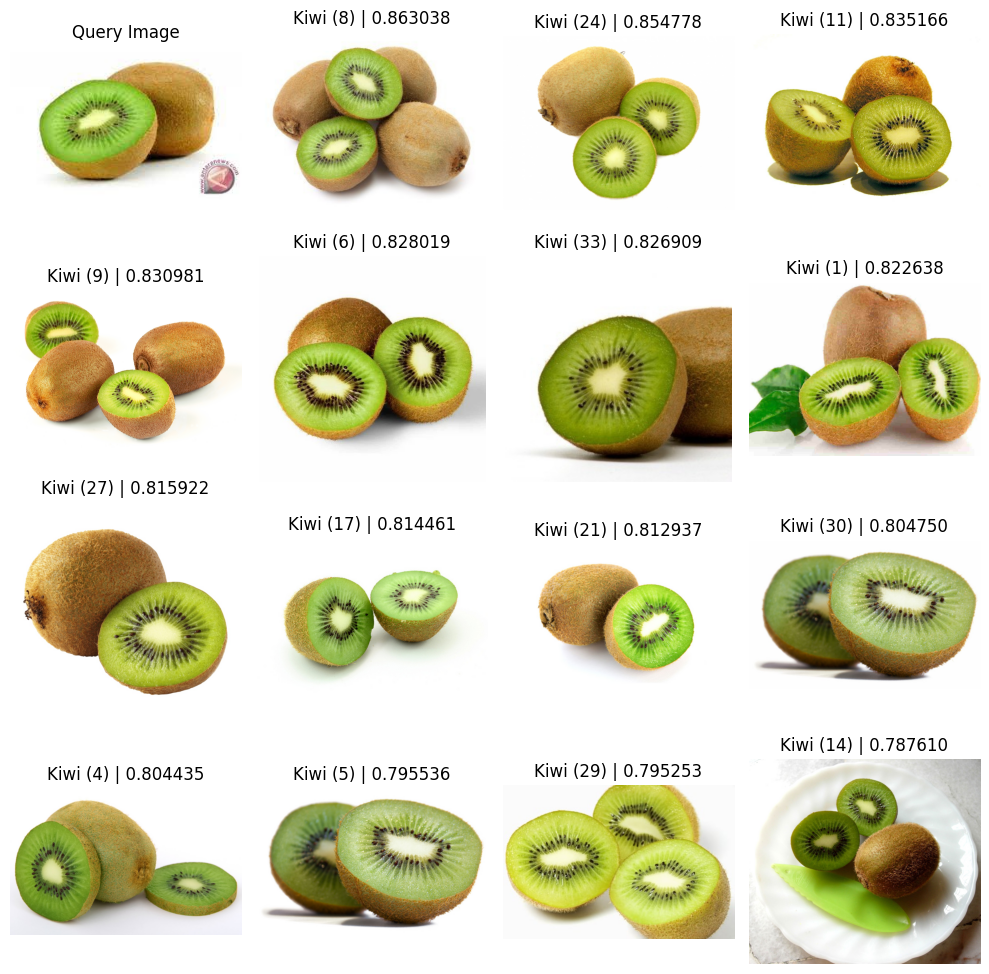

In [14]:
# Load saved features and image paths
features = np.load("fruits/features.npy")
image_paths = np.load("fruits/image_paths.npy")
file_names = np.load("fruits/file_names.npy")

print('Fruits List.')
print('1. Apple')
print('2. Banana')
print('3. Grapes')
print('4. Cherry')
print('5. Orange')
print('6. Chickoo')
print('7. Mango')
print('8. Strawberry')
print('9. Kiwi')

sel  = int(input('Select: '))

if sel == 1:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesApel.jpg")
elif sel == 2:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesPisang.jpg")
elif sel == 3:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesAnggur.jpg")
elif sel == 4:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesCeri.jpg")
elif sel == 5:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesJeruk.jpg")
elif sel == 6:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesChiku.jpg")
elif sel == 7:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesMangga.jpg")
elif sel == 8:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesStroberi.jpg")
elif sel == 9:
    # Load and extract features for the query image
    query_image = Image.open("fruits/TesKiwi.jpg")

query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Convert distances to similarity scores using cosine similarity
similarities = np.dot(features, query_feature) / (np.linalg.norm(features, axis=1) * np.linalg.norm(query_feature))

# Get indices of the matched images
indices = np.argsort(dists)[:15]  # Select the top 5 closest images
matched_images = image_paths[indices]
matched_file_names = file_names[indices]
similarities = similarities[indices]

# Display the query image and matched images with their file names
num_matched_images = len(matched_images)

num_rows = int(np.ceil((num_matched_images + 1) / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot matched images
for i, (image_path, file_name, scores, ax) in enumerate(zip(matched_images, matched_file_names, similarities, axes.flatten()[1:])):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title("%s | %f" %(file_name, scores))
    ax.axis('off')

# Remove empty subplots if necessary
if (num_matched_images + 1) % 4 != 0:
    for j in range((num_matched_images + 1) % 4, 4):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()